# Распространение тепла

### Условие задачи

**Дано:**
- твердое тело, в массе которого распространяется тепло от нескольких источников
- тело - куб $[0, L] x [0, L] x [0, L]$ с коэффициентом диффузии $D = 4.0$
- в центре куба расположен шар радиуса $R = L/5$ с низким коэффициентом диффузии $D_R = 10^{-12}$
- $T_0 = 0$ - начальная температура во всем объеме куба
- граничные условия на гранях куба двух видов:
    - фиксированная температура на гранях
        - $x = 0$
        - $y = L$
    - абсолютная теплоизоляция на гранях
        - $x = L$
        - $y = 0$ 
        - $z = 0$
        - $z = L$ 
- в массе куба расположены источники тепла, мощность которых меняется по периодическому закону $\dot{q}_i = p_i \cdot (sin(\frac{2\pi}{\theta_i}t + \phi_i) + 1)$

    - пластина 0:
        - центр $(0.2L, 0.5L, 0.5L)$
        - размеры (от центра до края) $(4/dx, 0.2L, 0.2L)$
        - $p_0 = 100$, $\theta_0 = 50$, $\phi_0 = 0$
        
    - пластина 1:
        - центр $(0.5L, 0.2L, 0.5L)$
        - размеры (от центра до края) $(0.2L, 4/dx, 0.2L)$
        - $p_0 = 100$, $\theta_0 = 77$, $\phi_0 = 10$
    
- координаты проб, для которых необходимо построить графики изменения температуры от времени
    - проба 0: $(0.3L, 0.3L, 0.5L)$
    - проба 1: $(0.3L, 0.7L, 0.5L)$
    - проба 2: $(0.7L, 0.7L, 0.5L)$
    - проба 3: $(0.7L, 0.3L, 0.5L)$
    
- $dx$ - шаг пространственного разбиения по всем трем измерениям
- $t_m = 600$ c - общее время моделирования

![](heat_transfer_task.png)
<center>Рис. 1. Сечение тела плоскостью z=L/2</center>


**Требуется:**
- согласно уравнению диффузии смоделировать распространение тепла в кубе на заданное время $t_m$ при:
    - $L = 100$
    - $(dx, dt) \in [(4, 0.2), (2, 0.1), (1, 0.05), (0.5, 0.025)]$
    
    
- для каждой пары $(dx, dt)$:
    1. вывести время расчета
    
    2. сохранить в файл(ы) и использовать в пунктах 3-5:
        - температурное поле в конечный момент времени
        - замеры температуры в местах установки проб

    3. построить цветовую карту в конечный момент времени в сечении $z = 0.5L$
        - подписать оси,
        - отобразить цветовую шкалу (colorbar),
        - отобразить пробы в виде точек и подписать их номера.

    4. на одном рисунке построить графики температур в местах установки проб
        - подписать оси,
        - вывести легенду.

    5. используя быстрое преобразование Фурье, восстановить периоды колебаний температуры в местах установки проб
        - `np.fft.rfft`, `np.fft.rfftfreq`, `scipy.signal.find_peaks`
    

**Описание:**

Распространение тепла можно описать при помощи уравнения диффузии (уравнение с частными производными):

$\frac{\partial{T}}{\partial{t}} = D \left(\frac{\partial^2{T}}{\partial{x^2}} + \frac{\partial^2{T}}{\partial{y^2}} + \frac{\partial^2{T}}{\partial{z^2}} \right) + \dot{q}$, где

- $T(t, x, y, z)$ - поле температур
- $D(x, y, z)$ - коэффициент диффузии
- $\dot q(t, x, y, z)$ - функция источников тепла

Для решения нестационарной задачи распространения тепла рассматриваемое тело представляют в виде сетки с равномерным шагом, а дифференциальное уравнение заменяют на конечно-разностное. Рассмотрим схему `FTCS`, т.е. производная по времени заменяется на правую разность (Forward Time), а вторая производная по пространственным переменным заменяется на центральную разность (Central Space).

$\frac{\partial{T}}{\partial{t}} \rightarrow \frac{T^{n}_{i,j,k} - T^{n-1}_{i,j,k}}{dt}$

$\frac{\partial^2{T}}{\partial{x^2}} \rightarrow \frac{T^{n-1}_{i-1,j,k} - 2T^{n-1}_{i,j,k} + T^{n-1}_{i+1,j,k}}{dx^2}, ...$


$\frac{T^{n}_{i,j} - T^{n-1}_{i,j}}{dt} = \frac{D_{i,j}}{dx^2} \left(T^{n-1}_{i-1,j,k} + T^{n-1}_{i+1,j,k} + T^{n-1}_{i,j-1,k}  + T^{n-1}_{i,j+1,k} + T^{n-1}_{i,j,k-1} + T^{n-1}_{i,j,k+1} - 6T^{n-1}_{i,j,k}\right) + \dot{q}$

Итоговая рекуррентная формула для вычисления температуры в момент времени $n \cdot dt$ в ячейке сетки $(i, j, k)$ на основании данных в момент времени $(n-1) \cdot dt$:

$T^{n}_{i,j} = T^{n-1}_{i,j} + \frac{dt D_{i,j,k}}{dx^2} \left(T^{n-1}_{i-1,j,k} + T^{n-1}_{i+1,j,k} + T^{n-1}_{i,j-1,k}  + T^{n-1}_{i,j+1,k} + T^{n-1}_{i,j,k-1} + T^{n-1}_{i,j,k+1} - 6T^{n-1}_{i,j,k}\right) + dt \cdot \dot{q}^{n}_{i,j,k}$

Временной шаг $dt$ должен быть таким, чтобы учитывать условие Курранта: $dt = \frac{C \cdot dx}{D}$, где $C$ - число Курранта.

В этой задаче рассматриваются граничные условия двух видов - фиксированная температура и абсолютная теплоизоляция. Оба вида граничных условий указаны на гранях куба. Таким образом, расчет распространения тепла выполняется для всех ячеек сетки, за исключением расположенных на гранях куба, т.е. $i, j, k \in (0, N-1)$, где $N = L / dx$.
Граничное условие в виде фиксированной температуры записывается в соответствующие граням куба ячейки сетки. 

Например, для грани $x = 0$: $T^{n}_{0,j,k} = T_*$, грани $x = L$: $T^{n}_{N-1,j,k} = T_*$. 


Граничное условие в виде абсолютной теплоизоляции означает, что через заданную грань нет потока тепла, а это достижимо, если температура в ячейках грани и прилегающим к ним ячейкам одинаковая. 

Например, $x = 0$: $T^{n}_{0,j,k} = T^{n}_{1,j,k}$, грани $x = L$: $T^{n}_{N-1,j,k} = T^{n}_{N-2,j,k}$.


**Материалы:**

- [Уравнение теплопроводности](https://ru.wikipedia.org/wiki/Уравнение_теплопроводности)
- [Solving 2D heat equation numerically using python](https://levelup.gitconnected.com/solving-2d-heat-equation-numerically-using-python-3334004aa01a)
- [Diffusion Eq 2D with Source](https://www.youtube.com/watch?v=aCRYfvh_bnY)


**Правила оценивания:**

- оценка за корректно выполненный расчет для пространственного шага $dx$, баллов из 100:
```
    dx    =   4,  2,  1, 0.5
    g(dx) =  10, 20, 30,  40
```
    
- штрафы $p(i)$, баллов:
    - не выведено время расчета - 20
    - не выполнено сохранение результатов в файл(ы) - 20
    - построение графиков не использует сохраненные результаты - 20
    - не построены графики температур в местах установки проб - 20
    - не построена карта - 20
    - не посчитаны периоды колебаний - 20
    - менее значимые недоработки - 10
    
    
- бонусы $b(j)$, баллов:
    - выполнить задания для $(dx, dt) = (0.25, 0.01)$ - 20


- итоговая оценка за задание = $\sum_{n=1}^{4}{g(L)} - \sum_{i}{p(i)} + \sum_{j}{b(j)}$


# Imports

In [ ]:
import numpy as np
from time import time
import matplotlib.pyplot as plt

from numba import njit
from scipy.signal import find_peaks

# Прототип

In [ ]:
def qi(p, theta, fi, t1):
    """
    Расчёт мощности источника в момент времени t
    :param p: амплитуда колебаний
    :param theta: период колебаний
    :param fi: смещение колебаний
    :param t: момент времени
    :return: мощность источника в данный момент времени
    """
    return p * (np.sin(2 * np.pi / theta * t1 + fi) + 1)


def Heater(T:np.ndarray, size: np.ndarray, c: np.ndarray, dt, dx, q):
    """
    функция определения зоны источника и прибавление в эту зону слагаемого энергии

    T: куб температур
    size: размеры источника
    c: центр источника
    dt: шаг времени
    q: мощность источника в данный момент времени
    """
    x1 = np.int_((c[0] - size[0]) / dx)
    x2 = np.int_((c[0] + size[0]) / dx)
    y1 = np.int_((c[1] - size[1]) / dx)
    y2 = np.int_((c[1] + size[1]) / dx)
    z1 = np.int_((c[2] - size[2]) / dx)
    z2 = np.int_((c[2] + size[2]) / dx)
    T[x1:x2+1, y1:y2+1, z1:z2+1] += q * dt
    

def Diffusion(T: np.ndarray, T_old: np.ndarray, n: int, c: np.ndarray, R: float, dx: float, dt: float):
    """
    функция моделирования процесса диффузии в "центральной области", без граничных случаев
    
    T: куб температур в данных момент времени
    T_old: куб температур в предыдущий момент времени
    n: число слоёв (n*n*n - кол-во ячеек в кубе)
    c: центр шара с низкого диффузией
    R: радиус этого шара
    dx: размер ячейки
    dt: шаг времени

    -все ячейки, центр которых расположен внутри шара, считаются ячейками шара с низкой диффузией
    -для каждой ячейки расчитывается новая температура с учётом известной диффузии в ней
    """
    D0 = 1
    Dr = 10 ** -16
    for i in range(1, n-1):
        for j in range(1, n-1):
            for k in range(1, n-1):
                if ((2 * i + 1) * dx / 2 - c[0]) ** 2 + ((2 * j + 1) * dx / 2 - c[1]) ** 2 + ((2 * k + 1) * dx / 2 - c[2]) ** 2 < (R ** 2):
                    D = Dr
                else:
                    D = D0
                T[i,j,k] = T_old[i,j,k] + dt / (dx ** 2) * D * (T_old[i-1,j,k] + T_old[i+1,j,k] + T_old[i,j-1,k] + T_old[i,j+1,k] + T_old[i,j,k-1] + T_old[i,j,k+1] - 6 * T_old[i,j,k])

def Isolation(T: np.ndarray):
    """
    функция моделирования темпертатуры в крайних гранях

    T: куб текущих температур

    -В x=0 (i=0) и y=L (j=n-1) температура фиксированная
    -В x=L, y=0, z=0, z=L теплоизоляция -> температура равна рядом лежащему слою
    """
    T[0,:,:] = 0
    T[:,-1,:] = 0
    T[-1,:,:] = T[-2,:,:]
    T[:,0,:] = T[:,1,:]
    T[:,:,0] = T[:,:,1]
    T[:,:,-1] = T[:,:,-2]
    

In [ ]:
def Simulation_demo():
    L=100
    h0_c = np.array([0.2 * L, 0.5 * L, 0.5 * L])
    h1_c = np.array([0.5 * L, 0.2 * L, 0.5 * L])
    sph_c = np.array([L / 2, L / 2, L / 2])
    T_temp = 0
    T_dots = np.array([[0],[0],[0],[0]])
    T_dots_current = np.array([[0],[0],[0],[0]])
    t = 100
    for (dx, dt) in [(4, 0.2)]: #, (2, 0.1) , (1, 0.05) , (0.5, 0.025)]:
        n_cells = L // dx

        h0_size = np.array([4 / dx, 0.2 * L, 0.2 * L])
        h1_size = np.array([0.2 * L, 4 / dx, 0.2 * L])

        cube_T0 = np.zeros((n_cells, n_cells, n_cells))
        cube_T1 = np.zeros((n_cells, n_cells, n_cells))

        dots_loc = [(int((0.3 * L) // dx), int((0.3 * L) // dx), int((0.5 * L) // dx)),
                    (int((0.3 * L) // dx), int((0.7 * L) // dx), int((0.5 * L) // dx)),
                    (int((0.7 * L) // dx), int((0.7 * L) // dx), int((0.5 * L) // dx)),
                    (int((0.7 * L) // dx), int((0.3 * L) // dx), int((0.5 * L) // dx))]
        start = time()

        for t0 in np.arange(dt, t, dt):
            h0_q = qi(100, 50, 0, t0)
            h1_q = qi(100, 77, 10, t0)
            Diffusion(cube_T1, cube_T0, n_cells, sph_c, 0.2 * L, dx, dt)
            Isolation(cube_T1)
            Heater(cube_T1, h0_size, h0_c, dt,dx, h0_q)
            Heater(cube_T1, h1_size, h1_c, dt,dx, h1_q)
            T_temp = cube_T0
            cube_T0 = cube_T1
            cube_T1 = T_temp
            for i in range(4):
                T_dots_current[i][0] = cube_T0[dots_loc[i]]
            T_dots = np.append(T_dots, T_dots_current, axis=1)
    fig, ax = plt.subplots(figsize=(15,10))
    x = np.arange(0, t, 0.2)
    for i in range(4):
        ax.plot(x, T_dots[i], label='Проба ' + str(i))
    ax.legend()

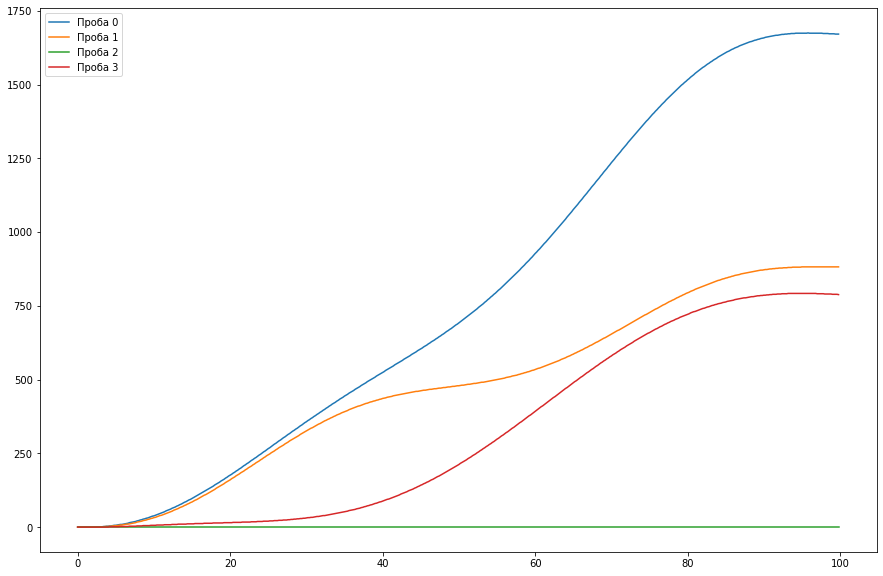

In [ ]:
Simulation_demo()

 Тест на первые 100 секунд прошёл успешно - можно переходить к оптимизации и выполнению остальных пунктов

# Njit-версия

## Вспомогательные функции

In [ ]:
@njit(fastmath=True)
def qi_njit(p, theta, fi, t1):
    """
    Расчёт мощности источника в момент времени t
    :param p: амплитуда колебаний
    :param theta: период колебаний
    :param fi: смещение колебаний
    :param t: момент времени
    :return: мощность источника в данный момент времени
    """
    return p * (np.sin(2. * np.pi / theta * t1 + fi) + 1.)

@njit(fastmath=True, boundscheck=False)
def Heater_njit(T:np.ndarray, size: np.ndarray, c: np.ndarray, dt, dx, q):
    """
    функция определения зоны источника и прибавление в эту зону слагаемого энергии

    T: куб температур
    size: размеры источника
    c: центр источника
    dt: шаг времени
    q: мощность источника в данный момент времени
    """
    x1 = np.int_((c[0] - size[0]) / dx)
    x2 = np.int_((c[0] + size[0]) / dx)
    y1 = np.int_((c[1] - size[1]) / dx)
    y2 = np.int_((c[1] + size[1]) / dx)
    z1 = np.int_((c[2] - size[2]) / dx)
    z2 = np.int_((c[2] + size[2]) / dx)
    T[x1:x2+1, y1:y2+1, z1:z2+1] += q * dt
    
@njit(fastmath=True, boundscheck=False)
def Diffusion_njit(T: np.ndarray, T_old: np.ndarray, n: int, c: np.ndarray, R: float, dx: float, dt: float):
    """
    функция моделирования процесса диффузии в "центральной области", без граничных случаев
    
    T: куб температур в данных момент времени
    T_old: куб температур в предыдущий момент времени
    n: число слоёв (n*n*n - кол-во ячеек в кубе)
    c: центр шара с низкого диффузией
    R: радиус этого шара
    dx: размер ячейки
    dt: шаг времени

    -все ячейки, центр которых расположен внутри шара, считаются ячейками шара с низкой диффузией
    -для каждой ячейки расчитывается новая температура с учётом известной диффузии в ней
    """
    D0 = 1.0
    Dr = 10 ** -16
    for i in range(1, n-1):
        for j in range(1, n-1):
            for k in range(1, n-1):
                if ((2 * i + 1) * dx / 2 - c[0]) ** 2 + ((2 * j + 1) * dx / 2 - c[1]) ** 2 + ((2 * k + 1) * dx / 2 - c[2]) ** 2 < (R ** 2):
                    D = Dr
                else:
                    D = D0
                T[i,j,k] = T_old[i,j,k] + dt / (dx ** 2) * D * (T_old[i-1,j,k] + T_old[i+1,j,k] + T_old[i,j-1,k] + T_old[i,j+1,k] + T_old[i,j,k-1] + T_old[i,j,k+1] - 6 * T_old[i,j,k])

@njit(fastmath=True, boundscheck=False)
def Isolation_njit(T: np.ndarray):
    """
    функция моделирования темпертатуры в крайних гранях

    T: куб текущих температур

    -В x=0 (i=0) и y=L (j=n-1) температура фиксированная
    -В x=L, y=0, z=0, z=L теплоизоляция -> температура равна рядом лежащему слою
    """
    T[0,:,:] = 0.
    T[:,-1,:] = 0.
    T[-1,:,:] = T[-2,:,:]
    T[:,0,:] = T[:,1,:]
    T[:,:,0] = T[:,:,1]
    T[:,:,-1] = T[:,:,-2]

## Шаги

In [ ]:
regimes_of_work = [(4, 0.2), (2, 0.1), (1, 0.05), (0.5, 0.025)]
time_of_work = 600
side_of_cube = 100

## Основная программа

In [ ]:
def Simulation(L, steps_list, period):
    h0_c = np.array([0.2 * L, 0.5 * L, 0.5 * L])
    h1_c = np.array([0.5 * L, 0.2 * L, 0.5 * L])
    sph_c = np.array([L / 2, L / 2, L / 2])
    T_temp = 0
    R = L/5
    for (dx, dt) in steps_list:
        n_cells = int(L / dx)

        h0_size = np.array([4, 0.2 * L, 0.2 * L])
        h1_size = np.array([0.2 * L, 4, 0.2 * L])

        cube_T0 = np.zeros((n_cells, n_cells, n_cells), dtype=np.single)
        cube_T1 = np.zeros((n_cells, n_cells, n_cells), dtype=np.single)

        dots_loc = [(int((0.3 * L) / dx), int((0.3 * L) / dx), int((0.5 * L) / dx)),
                    (int((0.3 * L) / dx), int((0.7 * L) / dx), int((0.5 * L) / dx)),
                    (int((0.7 * L) / dx), int((0.7 * L) / dx), int((0.5 * L) / dx)),
                    (int((0.7 * L) / dx), int((0.3 * L) / dx), int((0.5 * L) / dx))]
        start = time()

        
        T_dots = np.zeros((len(dots_loc),1))
        T_dots_current = np.zeros((len(dots_loc),1))

        for t0 in np.arange(dt, period, dt):
            h0_q = qi_njit(100., 50., 0., t0)
            h1_q = qi_njit(100, 77., 10., t0)
            
            Diffusion_njit(cube_T1, cube_T0, n_cells, sph_c, 0.2 * L, dx, dt)
            Isolation_njit(cube_T1)
            Heater_njit(cube_T1, h0_size, h0_c, dt, dx, h0_q)
            Heater_njit(cube_T1, h1_size, h1_c, dt, dx, h1_q)

            T_temp = cube_T0
            cube_T0 = cube_T1
            cube_T1 = T_temp

            for i in range(len(dots_loc)):
                T_dots_current[i][0] = cube_T0[dots_loc[i]]
            T_dots = np.append(T_dots, T_dots_current, axis=1)

        np.save('T_end_' + str(dx) + '_' + str(dt) + '.npy', cube_T0[:,:,int(0.5 * L / dx)])
        np.save('T_dots_' + str(dx) + '_' + str(dt) + '.npy', T_dots)
        print(f"for t = {period}, dx = {dx}, dt = {dt}: time = {round(time() - start, 4)} s")


def Analysis(size, steps_list, t1):
    T_end = 0
    dots = 0
    L = size
    for (dx, dt) in steps_list:
        print(f'Режим: dx = {dx}, dt = {dt}')
        n_cells = L // dx
        dots_loc = np.array([[int((0.3 * L) / dx), int((0.3 * L) / dx), int((0.5 * L) / dx)],
                    [int((0.3 * L) / dx), int((0.7 * L) / dx), int((0.5 * L) / dx)],
                    [int((0.7 * L) / dx), int((0.7 * L) / dx), int((0.5 * L) / dx)],
                    [int((0.7 * L) / dx), int((0.3 * L) / dx), int((0.5 * L) / dx)]])

        fig, ax = plt.subplots(1, 2, figsize=(15,7))
        a = np.load('T_end_' + str(dx) + '_' + str(dt) + '.npy')
        array_of_T = a
        
        im = ax[1].pcolormesh(np.arange(n_cells) * dx, np.arange(n_cells) * dx, array_of_T.T)
        for dot in dots_loc:
            ax[1].scatter(dot[0] * dx + dx/2, dot[1] * dx + dx/2)
        plt.colorbar(im)
        ax[1].set_xlabel('x', fontsize=20)
        ax[1].set_ylabel('y', fontsize=20)
        fig.suptitle(f'dx = {dx}, dt = {dt}', fontsize=20)

        dots = np.load('T_dots_' + str(dx) + '_' + str(dt) + '.npy')
        x = np.arange(0, t1, dt)


        fr = int(300 / dt)
        to = int(600 / dt)
        for i in range(4):
            ax[0].plot(x, dots[i], label='Проба ' + str(i))
            r = np.fft.rfft(dots[i][fr: to])
            amp = np.abs(r) / ((to - fr) / 2)
            freq = np.fft.rfftfreq(int(to - fr), dt)
            idx, h = find_peaks(amp, height=1)
            print(f'\t периоды колебаний в пробе {i}: {1/freq[idx]}')
        ax[0].set_xlabel('t', fontsize=20)
        ax[0].set_ylabel('T', fontsize=20)
        ax[0].legend()
        plt.show()

## Анализ данных

In [ ]:
Simulation(side_of_cube, regimes_of_work, time_of_work)

for t = 600, dx = 4, dt = 0.2: time = 2.8938 s
for t = 600, dx = 2, dt = 0.1: time = 2.5277 s
for t = 600, dx = 1, dt = 0.05: time = 38.6371 s
for t = 600, dx = 0.5, dt = 0.025: time = 563.8468 s


Режим: dx = 4, dt = 0.2
	 периоды колебаний в пробе 0: [75. 50.]
	 периоды колебаний в пробе 1: [50.]
	 периоды колебаний в пробе 2: []
	 периоды колебаний в пробе 3: [75.]


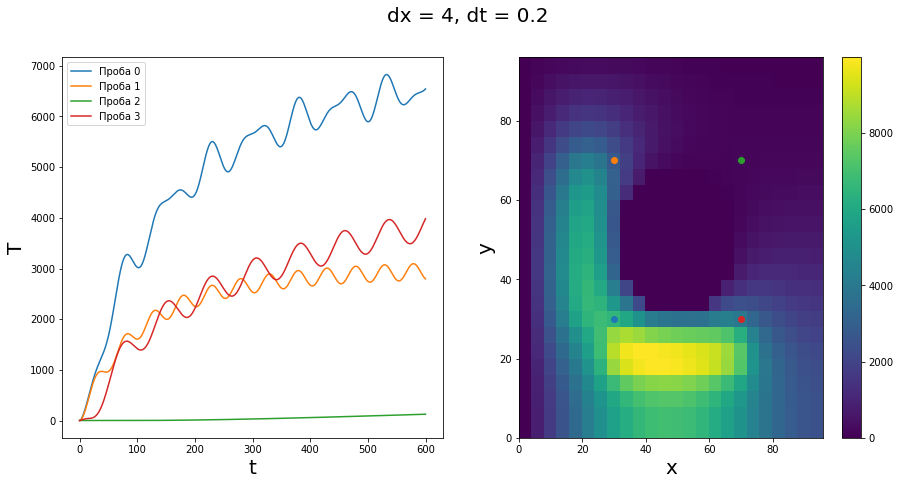

Режим: dx = 2, dt = 0.1
	 периоды колебаний в пробе 0: [75. 50.]
	 периоды колебаний в пробе 1: [50.]
	 периоды колебаний в пробе 2: []
	 периоды колебаний в пробе 3: [75.]


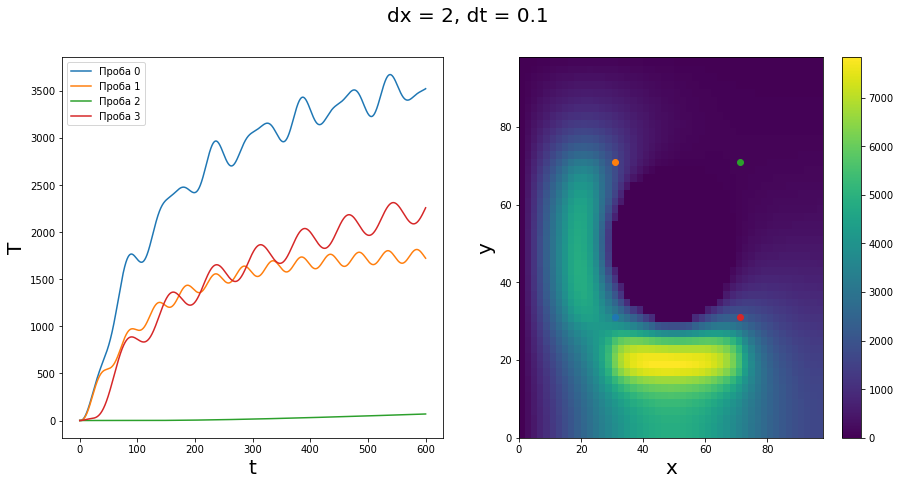

Режим: dx = 1, dt = 0.05
	 периоды колебаний в пробе 0: [75. 50.]
	 периоды колебаний в пробе 1: [50.]
	 периоды колебаний в пробе 2: []
	 периоды колебаний в пробе 3: [75. 50.]


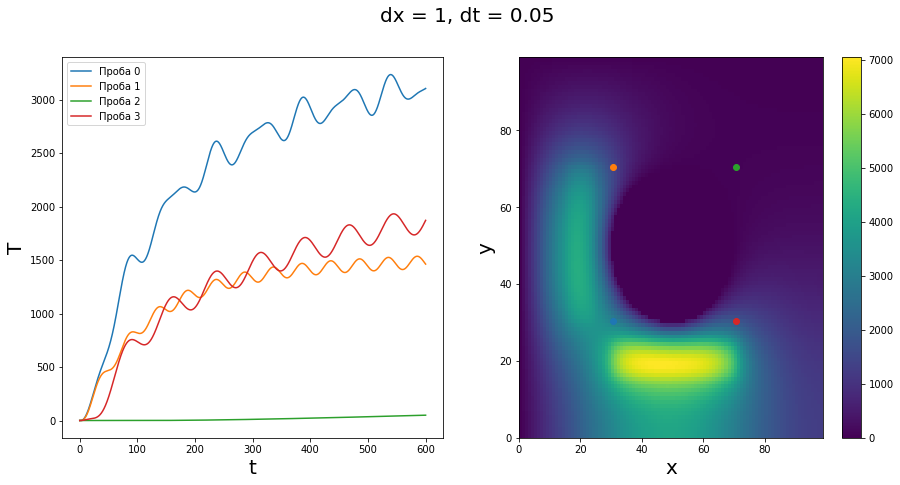

Режим: dx = 0.5, dt = 0.025
	 периоды колебаний в пробе 0: [75. 50.]
	 периоды колебаний в пробе 1: [50.]
	 периоды колебаний в пробе 2: []
	 периоды колебаний в пробе 3: [75. 50.]


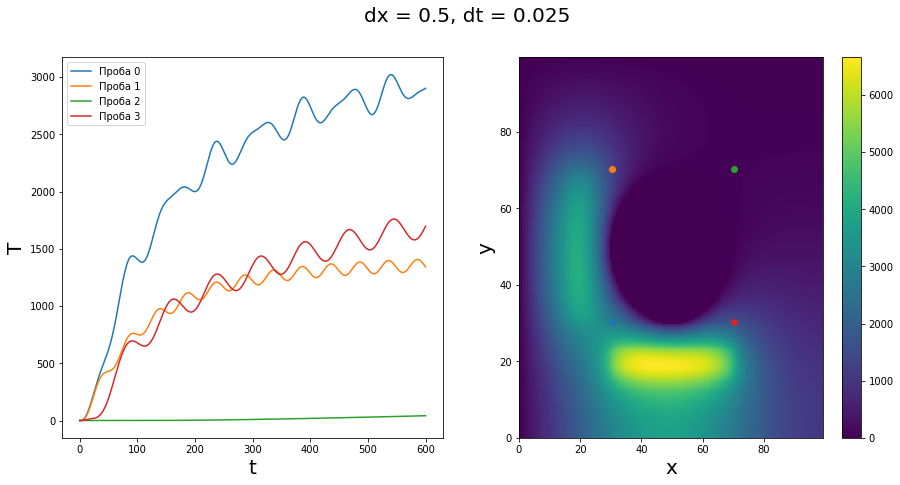

In [ ]:
Analysis(side_of_cube, regimes_of_work, time_of_work)